 # WATER POTABILITY PREDICTION MODEL

The dataset used for this model was gotten from https://www.hydroshare.org/resource/4ab43e1b507b496b9b42749701daed5c/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

C:\Users\USER\anaconda3\envs\py310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\envs\py310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\USER\anaconda3\envs\py310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_excel('Datasets/aquaattributes.xlsx')

In [3]:
df.head(20)

,Stationcode,Locations,Lat,Lon,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,1001,BEAS AT U/S MANALI,32.244947,77.191080,Shimla,HIMACHAL PRADESH,9.0,9.0,8.0,85,0.10,0.2,106,397.0,yes
1,1002,BEAS AT D/S KULU,31.960582,77.114009,Shimla,HIMACHAL PRADESH,10.0,9.0,8.0,102,0.30,0.4,153,954.0,yes
2,1003,BEAS AT D/S AUT,26.887893,75.811484,Shimla,HIMACHAL PRADESH,11.0,9.0,8.0,96,0.20,0.3,58,653.0,yes
3,1004,BEAS AT U/S PANDON DAM,47.351943,19.633621,Shimla,HIMACHAL PRADESH,13.0,9.0,8.0,94,0.20,0.4,34,317.0,yes
4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,25.992786,91.826111,Shimla,HIMACHAL PRADESH,14.0,10.0,8.0,112,0.20,0.5,213,1072.0,yes
5,1550,U/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,117,0.20,0.5,100,722.0,yes
6,1006,BEAS AT D/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,155,0.50,0.7,445,1855.0,yes
7,2604,BEAS AT D/S JAISINGHPUR,31.899643,76.597945,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,211,0.50,0.5,7,72.0,yes
8,1007,BEAS AT D/S ALAMPUR,15.884349,78.119382,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,202,0.60,0.4,9,123.0,yes
9,1008,BEAS AT D/S DEHRAGOPIPUR,31.881756,76.214645,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,280,0.70,1.1,10,157.0,yes


In [4]:
df.shape

(1361, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1324 non-null   object 
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1152 non-null   object 
 12  Fecalcaliform  1173 non-null   object 
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 159.6+ KB


In [6]:
df.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              1
Temperature       34
D.O                9
pH                 1
Conductivity      37
B.O.D             68
Nitrate          209
Fecalcaliform    188
Totalcaliform    135
class              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(967, 15)

In [9]:
df.isnull().sum()

Stationcode      0
Locations        0
Lat              0
Lon              0
Capitalcity      0
State            0
Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    object 
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    object 
 12  Fecalcaliform  967 non-null    object 
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 120.9+ KB


In [11]:
cndt = df['Conductivity']

In [12]:
[x for x in cndt.apply(type).unique()]

[int, float]

In [13]:
df['Conductivity'] = df['Conductivity'].astype(float)

In [14]:
nitr = df['Nitrate']

In [15]:
[x for x in nitr.apply(type).unique()]

[float, int]

In [16]:
df['Nitrate'] = df['Nitrate'].astype(float)

In [17]:
fclf = df['Fecalcaliform']

In [18]:
[x for x in fclf.apply(type).unique()]

[int, float]

In [19]:
df['Fecalcaliform'] = df['Fecalcaliform'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    float64
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    float64
 12  Fecalcaliform  967 non-null    float64
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(10), int64(1), object(4)
memory usage: 120.9+ KB


In [21]:
df.describe()

,Stationcode,Lat,Lon,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,9.670000e+02
mean,1899.374354,20.970569,78.364700,25.355714,6.891423,7.668664,1323.534458,3.738066,5.075913,1.773840e+05,5.361407e+05
std,706.222881,6.459671,6.894196,4.413136,1.674220,0.478087,3703.988886,8.546417,30.069937,3.792506e+06,1.015845e+07
min,4.000000,8.388518,19.633621,5.000000,0.000000,5.200000,25.250000,0.000000,0.000000,1.400000e+00,5.000000e-03
25%,1326.500000,17.000538,74.970558,24.000000,6.200000,7.450000,201.500000,1.021250,0.304167,1.579167e+01,5.000000e+01
50%,1960.000000,21.007658,76.852727,26.458333,7.091667,7.788333,388.000000,2.091667,0.800000,1.441667e+02,4.650000e+02
75%,2515.500000,26.234941,80.964831,27.908333,7.750000,8.000000,754.333333,3.936667,2.000000,8.245833e+02,1.746665e+03
max,3029.000000,47.351943,95.999123,37.500000,30.366667,9.575000,36593.000000,158.750000,640.000000,1.100000e+08,2.500000e+08


In [22]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [23]:
df_new['class'] = df_new['class'] == 'yes'

In [24]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [26]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


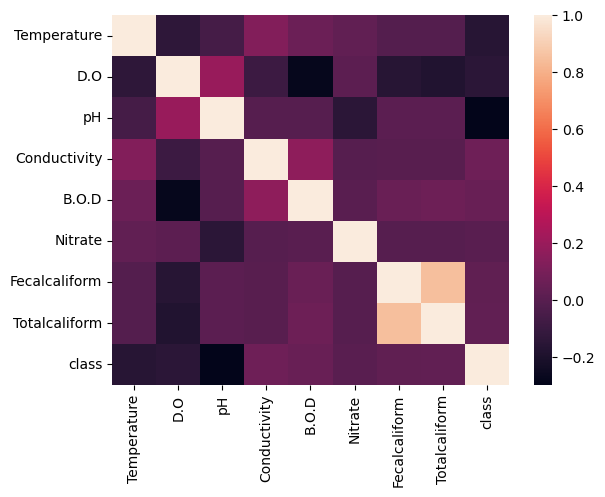

In [27]:
sns.heatmap(df_new.corr());

In [28]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [29]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [30]:
df_new['class'] = df_new['class'] == 'yes'

In [31]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [33]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


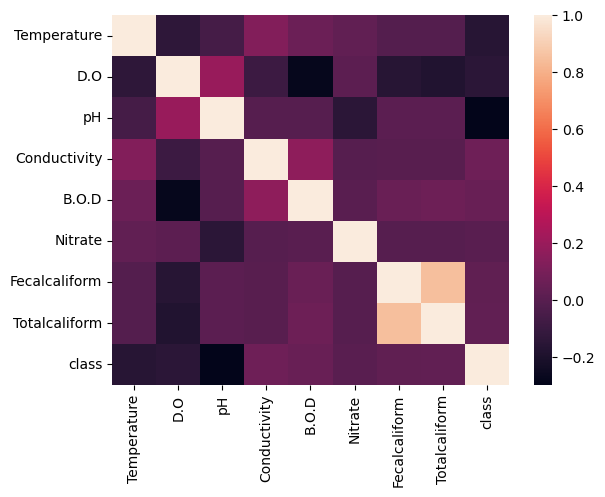

In [34]:
sns.heatmap(df_new.corr());

In [35]:
X = df.loc[:,['Temperature','D.O','Conductivity','B.O.D','Totalcaliform']]

In [36]:
X.head()

,Temperature,D.O,Conductivity,B.O.D,Totalcaliform
0,9.0,9.0,85.0,0.1,397.0
1,10.0,9.0,102.0,0.3,954.0
2,11.0,9.0,96.0,0.2,653.0
3,13.0,9.0,94.0,0.2,317.0
4,14.0,10.0,112.0,0.2,1072.0


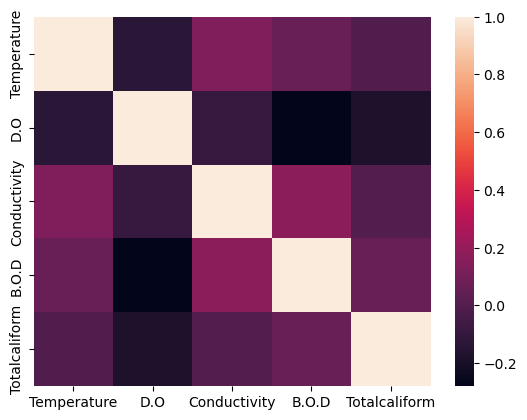

In [37]:
sns.heatmap(X.corr());

In [38]:
[x for x in df['class'].apply(type).unique()]

[str]

In [39]:
df_new['class'].unique()

array([ True, False])

In [40]:
y = df_new['pH']

In [41]:
y.value_counts()

8.000000    72
7.600000    24
7.500000    22
7.800000    22
7.700000    22
            ..
7.872000     1
7.680000     1
7.637500     1
7.545000     1
7.453636     1
Name: pH, Length: 577, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [44]:
X_train.shape

(773, 5)

In [45]:
y_train.shape

(773,)

In [46]:
X_val.shape

(194, 5)

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error as MSE

In [48]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500]

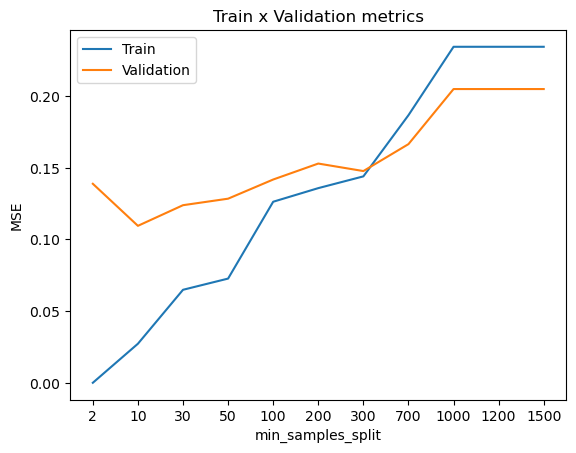

In [49]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [50]:
min_samples_split_list = np.arange(2,30)

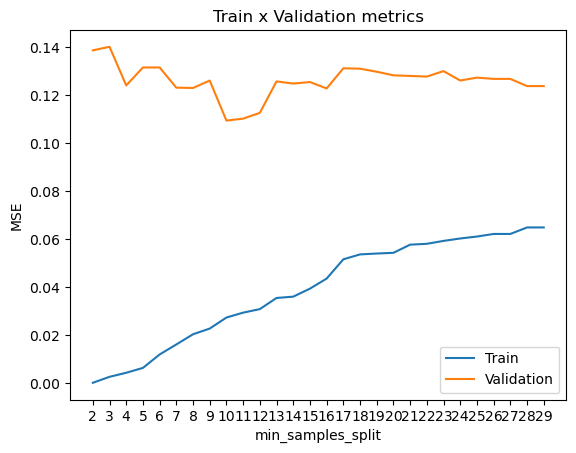

In [51]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [52]:
min_samples_split_list = np.arange(5,15)

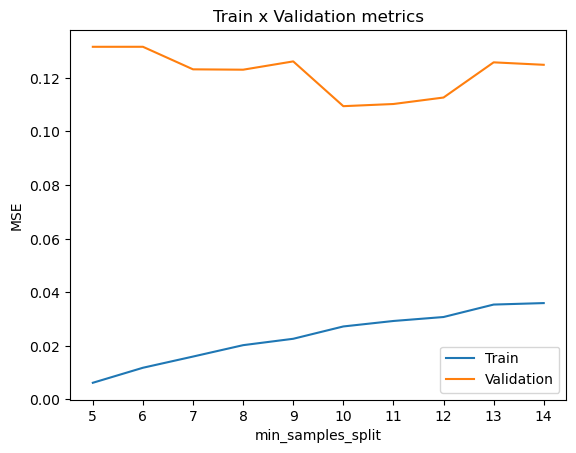

In [53]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [54]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

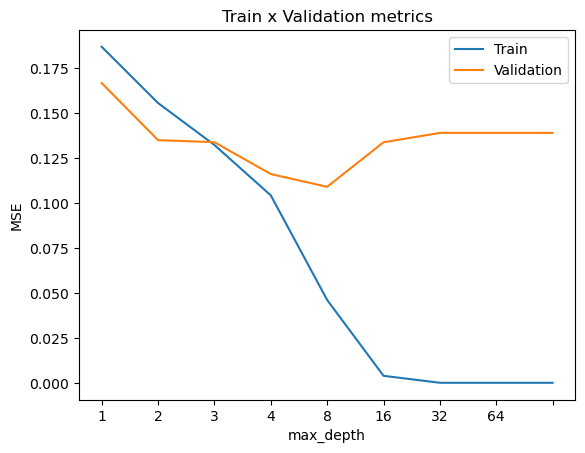

In [55]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [56]:
max_depth_list = np.arange(4,16)

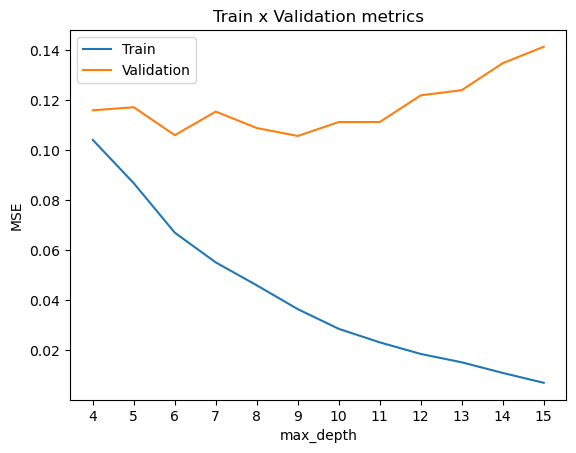

In [57]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

    Chosen max_depth = 6
    Chosen min_samples_split = 10

In [58]:
decision_tree_pH_model = DecisionTreeRegressor(min_samples_split = 10,
                                             max_depth = 6,
                                             random_state = 123).fit(X_train,y_train)

In [59]:
print(f"MSE for train:\n\tMSE: {MSE(decision_tree_pH_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(decision_tree_pH_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.0709
MSE for validation:
	MSE: 0.1084


In [60]:
y_pred_pH = decision_tree_pH_model.predict(X_val)

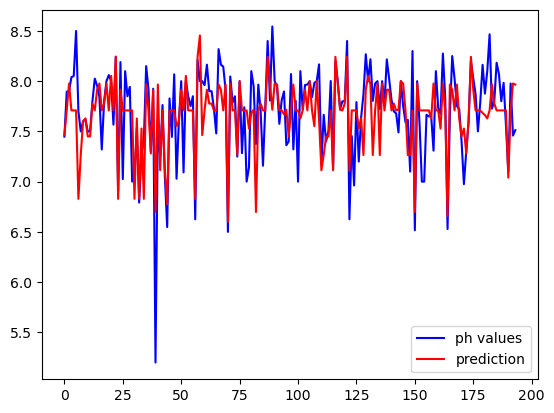

In [61]:
plt.plot(range(len(y_val)),y_val,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best');

In [62]:
diff_pH = y_pred_pH - y_val

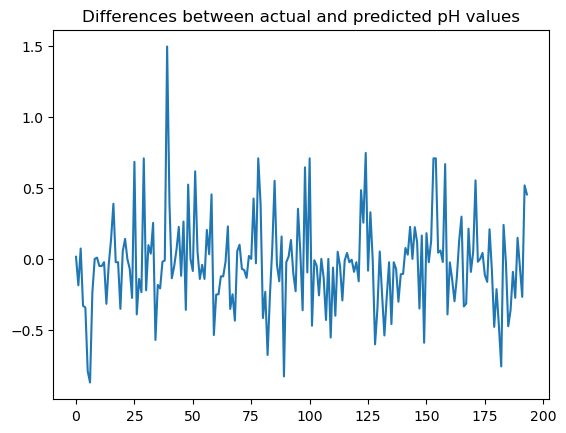

In [63]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values');

In [64]:
decision_tree_pH_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
degree_list = np.arange(1,5)

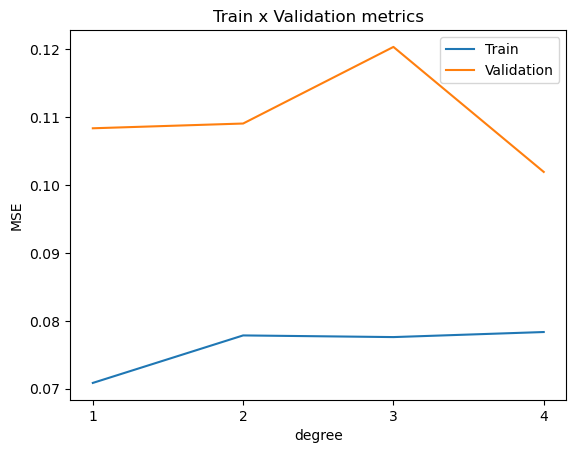

In [67]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = DecisionTreeRegressor(min_samples_split = 10,
                                  max_depth = 6,
                                  random_state = 123).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [68]:
MSE_list_val

[0.10838863202703962,
 0.10908932880376378,
 0.12037776886298138,
 0.10195773045383393]

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500, 2000]

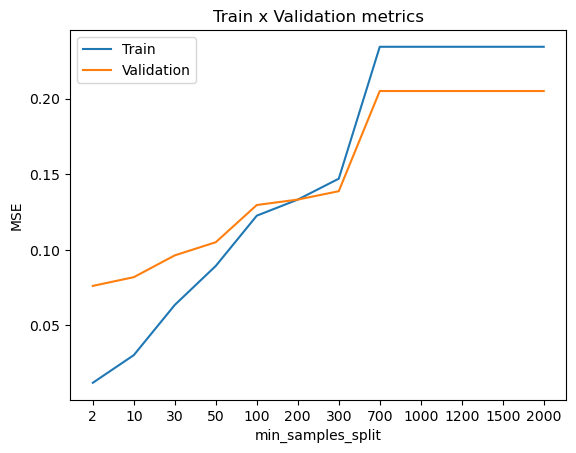

In [71]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [72]:
min_samples_split_list = np.arange(2,11)

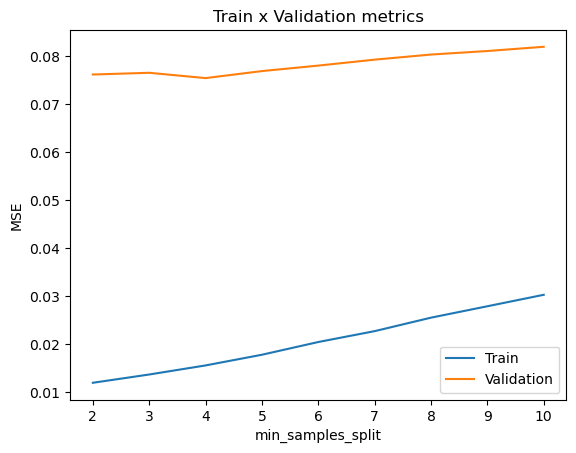

In [73]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [74]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

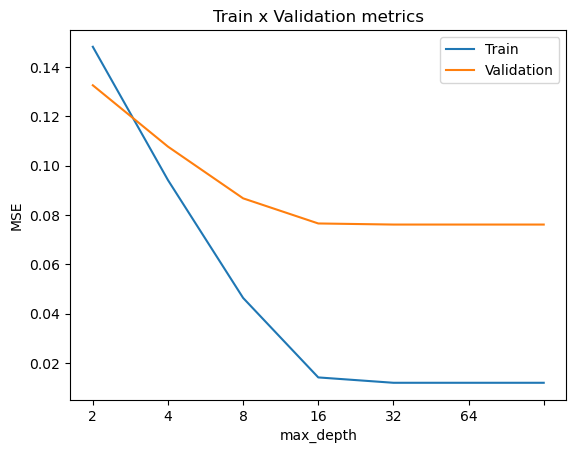

In [75]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [76]:
max_depth_list = np.arange(8,33)

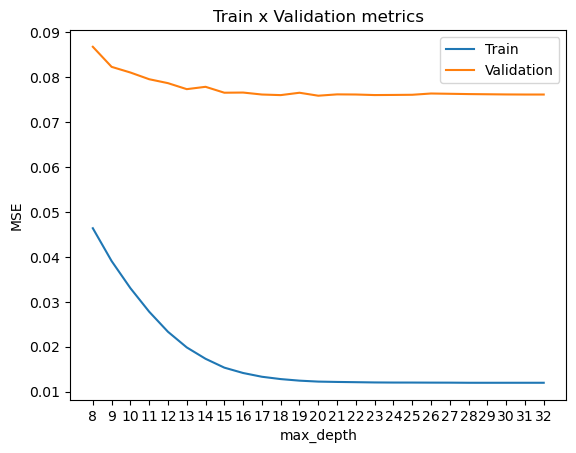

In [77]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [78]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

12

In [79]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

20

In [80]:
n_estimators_list = [10,50,100,500,1000,2000]

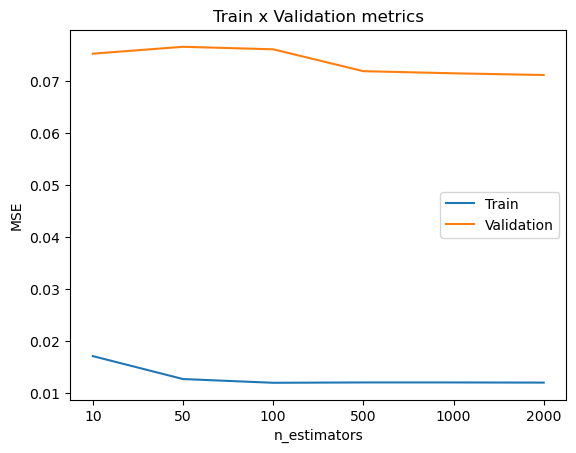

In [81]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [82]:
n_estimators_list = np.arange(100,1000,50)

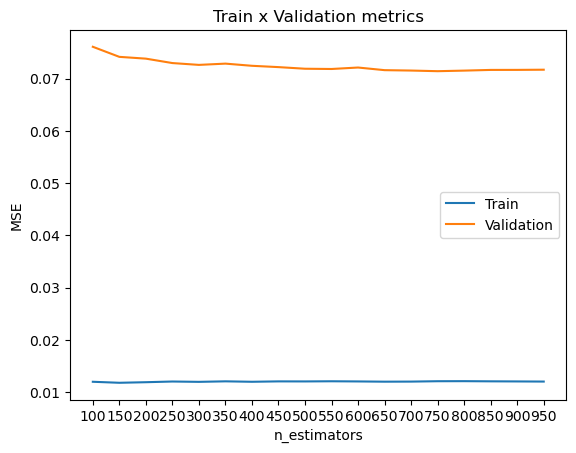

In [83]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [84]:
MSE_list_val

[0.0760797756697607,
 0.0741513114666659,
 0.07380889226383025,
 0.07296330803504462,
 0.07261335839391912,
 0.07285545780852679,
 0.07244078735017437,
 0.07218702608294222,
 0.07187719462529839,
 0.07182879736751788,
 0.07210871483005704,
 0.07160512928271434,
 0.07152955654601435,
 0.07140803004432142,
 0.07151854186709282,
 0.07165079944349145,
 0.07165710691108318,
 0.07169153145147004]

In [85]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

13

In [86]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

750

    Chosen max_depth = 20
    Chosen n_estimators = 750
    Chosen min_samples_split = 4

In [87]:
random_forest_pH_model = RandomForestRegressor(n_estimators = 750,
                                             max_depth = 20, 
                                             min_samples_split = 4).fit(X_train,y_train)

In [88]:
print(f"MSE for train:\n\tMSE: {MSE(random_forest_pH_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(random_forest_pH_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.0158
MSE for validation:
	MSE: 0.0731


In [89]:
y_pred_pH = random_forest_pH_model.predict(X_val)

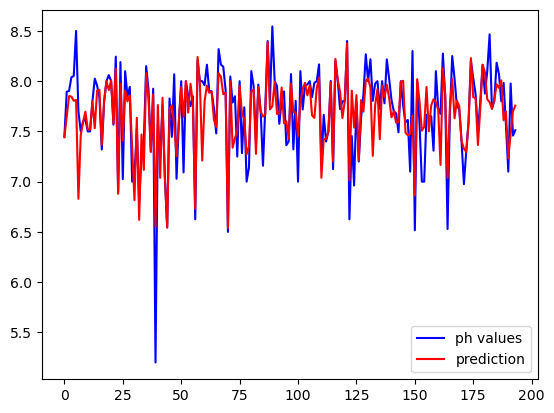

In [90]:
plt.plot(range(len(y_val)),y_val,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best');

In [91]:
diff_pH = y_pred_pH - y_val

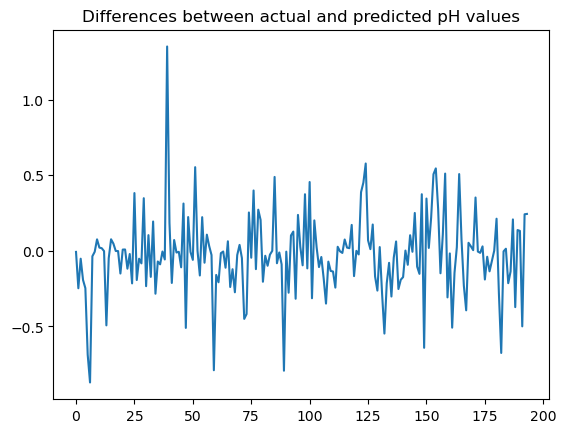

In [92]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values');

In [93]:
from xgboost import XGBRegressor

In [94]:
n = int(len(X_train)*0.8) ## Using 80% to train and 20% to eval

In [95]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [96]:
n_estimators_list = [10,50,100,500,1000,2000]

In [97]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = XGBRegressor(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

[0]	validation_0-rmse:4.99489
[1]	validation_0-rmse:3.50403
[2]	validation_0-rmse:2.46012
[3]	validation_0-rmse:1.73351
[4]	validation_0-rmse:1.24365
[5]	validation_0-rmse:0.90196
[6]	validation_0-rmse:0.67721
[7]	validation_0-rmse:0.53360
[8]	validation_0-rmse:0.43797
[9]	validation_0-rmse:0.39260
[0]	validation_0-rmse:4.99489
[1]	validation_0-rmse:3.50403
[2]	validation_0-rmse:2.46012
[3]	validation_0-rmse:1.73351
[4]	validation_0-rmse:1.24365
[5]	validation_0-rmse:0.90196
[6]	validation_0-rmse:0.67721
[7]	validation_0-rmse:0.53360
[8]	validation_0-rmse:0.43797
[9]	validation_0-rmse:0.39260
[10]	validation_0-rmse:0.36147
[11]	validation_0-rmse:0.34573
[12]	validation_0-rmse:0.33988
[13]	validation_0-rmse:0.33926
[14]	validation_0-rmse:0.34309
[15]	validation_0-rmse:0.34379
[16]	validation_0-rmse:0.34223
[17]	validation_0-rmse:0.34142
[18]	validation_0-rmse:0.34175
[19]	validation_0-rmse:0.34147
[20]	validation_0-rmse:0.34038
[21]	validation_0-rmse:0.34158
[22]	validation_0-rmse:0.341

[106]	validation_0-rmse:0.34729
[107]	validation_0-rmse:0.34729
[108]	validation_0-rmse:0.34729
[109]	validation_0-rmse:0.34730
[110]	validation_0-rmse:0.34756
[111]	validation_0-rmse:0.34743
[112]	validation_0-rmse:0.34747
[113]	validation_0-rmse:0.34746
[114]	validation_0-rmse:0.34764
[115]	validation_0-rmse:0.34769
[116]	validation_0-rmse:0.34764
[117]	validation_0-rmse:0.34766
[118]	validation_0-rmse:0.34764
[119]	validation_0-rmse:0.34756
[120]	validation_0-rmse:0.34757
[121]	validation_0-rmse:0.34752
[122]	validation_0-rmse:0.34744
[123]	validation_0-rmse:0.34750
[124]	validation_0-rmse:0.34752
[125]	validation_0-rmse:0.34750
[126]	validation_0-rmse:0.34746
[127]	validation_0-rmse:0.34744
[128]	validation_0-rmse:0.34742
[129]	validation_0-rmse:0.34744
[130]	validation_0-rmse:0.34732
[131]	validation_0-rmse:0.34734
[132]	validation_0-rmse:0.34732
[133]	validation_0-rmse:0.34733
[134]	validation_0-rmse:0.34735
[135]	validation_0-rmse:0.34742
[136]	validation_0-rmse:0.34740
[137]	va

[363]	validation_0-rmse:0.34751
[364]	validation_0-rmse:0.34751
[365]	validation_0-rmse:0.34751
[366]	validation_0-rmse:0.34751
[367]	validation_0-rmse:0.34751
[368]	validation_0-rmse:0.34751
[369]	validation_0-rmse:0.34751
[370]	validation_0-rmse:0.34751
[371]	validation_0-rmse:0.34751
[372]	validation_0-rmse:0.34751
[373]	validation_0-rmse:0.34751
[374]	validation_0-rmse:0.34751
[375]	validation_0-rmse:0.34751
[376]	validation_0-rmse:0.34751
[377]	validation_0-rmse:0.34751
[378]	validation_0-rmse:0.34751
[379]	validation_0-rmse:0.34751
[380]	validation_0-rmse:0.34751
[381]	validation_0-rmse:0.34751
[382]	validation_0-rmse:0.34751
[383]	validation_0-rmse:0.34751
[384]	validation_0-rmse:0.34751
[385]	validation_0-rmse:0.34751
[386]	validation_0-rmse:0.34751
[387]	validation_0-rmse:0.34751
[388]	validation_0-rmse:0.34751
[389]	validation_0-rmse:0.34751
[390]	validation_0-rmse:0.34751
[391]	validation_0-rmse:0.34751
[392]	validation_0-rmse:0.34751
[393]	validation_0-rmse:0.34751
[394]	va

[123]	validation_0-rmse:0.34750
[124]	validation_0-rmse:0.34752
[125]	validation_0-rmse:0.34750
[126]	validation_0-rmse:0.34746
[127]	validation_0-rmse:0.34744
[128]	validation_0-rmse:0.34742
[129]	validation_0-rmse:0.34744
[130]	validation_0-rmse:0.34732
[131]	validation_0-rmse:0.34734
[132]	validation_0-rmse:0.34732
[133]	validation_0-rmse:0.34733
[134]	validation_0-rmse:0.34735
[135]	validation_0-rmse:0.34742
[136]	validation_0-rmse:0.34740
[137]	validation_0-rmse:0.34739
[138]	validation_0-rmse:0.34740
[139]	validation_0-rmse:0.34741
[140]	validation_0-rmse:0.34745
[141]	validation_0-rmse:0.34744
[142]	validation_0-rmse:0.34743
[143]	validation_0-rmse:0.34742
[144]	validation_0-rmse:0.34742
[145]	validation_0-rmse:0.34742
[146]	validation_0-rmse:0.34742
[147]	validation_0-rmse:0.34741
[148]	validation_0-rmse:0.34739
[149]	validation_0-rmse:0.34740
[150]	validation_0-rmse:0.34739
[151]	validation_0-rmse:0.34739
[152]	validation_0-rmse:0.34740
[153]	validation_0-rmse:0.34742
[154]	va

[380]	validation_0-rmse:0.34751
[381]	validation_0-rmse:0.34751
[382]	validation_0-rmse:0.34751
[383]	validation_0-rmse:0.34751
[384]	validation_0-rmse:0.34751
[385]	validation_0-rmse:0.34751
[386]	validation_0-rmse:0.34751
[387]	validation_0-rmse:0.34751
[388]	validation_0-rmse:0.34751
[389]	validation_0-rmse:0.34751
[390]	validation_0-rmse:0.34751
[391]	validation_0-rmse:0.34751
[392]	validation_0-rmse:0.34751
[393]	validation_0-rmse:0.34751
[394]	validation_0-rmse:0.34751
[395]	validation_0-rmse:0.34751
[396]	validation_0-rmse:0.34751
[397]	validation_0-rmse:0.34751
[398]	validation_0-rmse:0.34751
[399]	validation_0-rmse:0.34751
[400]	validation_0-rmse:0.34751
[401]	validation_0-rmse:0.34751
[402]	validation_0-rmse:0.34751
[403]	validation_0-rmse:0.34751
[404]	validation_0-rmse:0.34751
[405]	validation_0-rmse:0.34751
[406]	validation_0-rmse:0.34751
[407]	validation_0-rmse:0.34751
[408]	validation_0-rmse:0.34751
[409]	validation_0-rmse:0.34751
[410]	validation_0-rmse:0.34751
[411]	va

[637]	validation_0-rmse:0.34751
[638]	validation_0-rmse:0.34751
[639]	validation_0-rmse:0.34751
[640]	validation_0-rmse:0.34751
[641]	validation_0-rmse:0.34751
[642]	validation_0-rmse:0.34751
[643]	validation_0-rmse:0.34751
[644]	validation_0-rmse:0.34751
[645]	validation_0-rmse:0.34751
[646]	validation_0-rmse:0.34751
[647]	validation_0-rmse:0.34751
[648]	validation_0-rmse:0.34751
[649]	validation_0-rmse:0.34751
[650]	validation_0-rmse:0.34751
[651]	validation_0-rmse:0.34751
[652]	validation_0-rmse:0.34751
[653]	validation_0-rmse:0.34751
[654]	validation_0-rmse:0.34751
[655]	validation_0-rmse:0.34751
[656]	validation_0-rmse:0.34751
[657]	validation_0-rmse:0.34751
[658]	validation_0-rmse:0.34751
[659]	validation_0-rmse:0.34751
[660]	validation_0-rmse:0.34751
[661]	validation_0-rmse:0.34751
[662]	validation_0-rmse:0.34751
[663]	validation_0-rmse:0.34751
[664]	validation_0-rmse:0.34751
[665]	validation_0-rmse:0.34751
[666]	validation_0-rmse:0.34751
[667]	validation_0-rmse:0.34751
[668]	va

[894]	validation_0-rmse:0.34751
[895]	validation_0-rmse:0.34751
[896]	validation_0-rmse:0.34751
[897]	validation_0-rmse:0.34751
[898]	validation_0-rmse:0.34751
[899]	validation_0-rmse:0.34751
[900]	validation_0-rmse:0.34751
[901]	validation_0-rmse:0.34751
[902]	validation_0-rmse:0.34751
[903]	validation_0-rmse:0.34751
[904]	validation_0-rmse:0.34751
[905]	validation_0-rmse:0.34751
[906]	validation_0-rmse:0.34751
[907]	validation_0-rmse:0.34751
[908]	validation_0-rmse:0.34751
[909]	validation_0-rmse:0.34751
[910]	validation_0-rmse:0.34751
[911]	validation_0-rmse:0.34751
[912]	validation_0-rmse:0.34751
[913]	validation_0-rmse:0.34751
[914]	validation_0-rmse:0.34751
[915]	validation_0-rmse:0.34751
[916]	validation_0-rmse:0.34751
[917]	validation_0-rmse:0.34751
[918]	validation_0-rmse:0.34751
[919]	validation_0-rmse:0.34751
[920]	validation_0-rmse:0.34751
[921]	validation_0-rmse:0.34751
[922]	validation_0-rmse:0.34751
[923]	validation_0-rmse:0.34751
[924]	validation_0-rmse:0.34751
[925]	va

[154]	validation_0-rmse:0.34742
[155]	validation_0-rmse:0.34741
[156]	validation_0-rmse:0.34742
[157]	validation_0-rmse:0.34739
[158]	validation_0-rmse:0.34739
[159]	validation_0-rmse:0.34739
[160]	validation_0-rmse:0.34737
[161]	validation_0-rmse:0.34737
[162]	validation_0-rmse:0.34737
[163]	validation_0-rmse:0.34738
[164]	validation_0-rmse:0.34737
[165]	validation_0-rmse:0.34738
[166]	validation_0-rmse:0.34738
[167]	validation_0-rmse:0.34741
[168]	validation_0-rmse:0.34741
[169]	validation_0-rmse:0.34740
[170]	validation_0-rmse:0.34747
[171]	validation_0-rmse:0.34747
[172]	validation_0-rmse:0.34744
[173]	validation_0-rmse:0.34748
[174]	validation_0-rmse:0.34749
[175]	validation_0-rmse:0.34751
[176]	validation_0-rmse:0.34746
[177]	validation_0-rmse:0.34749
[178]	validation_0-rmse:0.34749
[179]	validation_0-rmse:0.34748
[180]	validation_0-rmse:0.34750
[181]	validation_0-rmse:0.34751
[182]	validation_0-rmse:0.34751
[183]	validation_0-rmse:0.34751
[184]	validation_0-rmse:0.34751
[185]	va

[411]	validation_0-rmse:0.34751
[412]	validation_0-rmse:0.34751
[413]	validation_0-rmse:0.34751
[414]	validation_0-rmse:0.34751
[415]	validation_0-rmse:0.34751
[416]	validation_0-rmse:0.34751
[417]	validation_0-rmse:0.34751
[418]	validation_0-rmse:0.34751
[419]	validation_0-rmse:0.34751
[420]	validation_0-rmse:0.34751
[421]	validation_0-rmse:0.34751
[422]	validation_0-rmse:0.34751
[423]	validation_0-rmse:0.34751
[424]	validation_0-rmse:0.34751
[425]	validation_0-rmse:0.34751
[426]	validation_0-rmse:0.34751
[427]	validation_0-rmse:0.34751
[428]	validation_0-rmse:0.34751
[429]	validation_0-rmse:0.34751
[430]	validation_0-rmse:0.34751
[431]	validation_0-rmse:0.34751
[432]	validation_0-rmse:0.34751
[433]	validation_0-rmse:0.34751
[434]	validation_0-rmse:0.34751
[435]	validation_0-rmse:0.34751
[436]	validation_0-rmse:0.34751
[437]	validation_0-rmse:0.34751
[438]	validation_0-rmse:0.34751
[439]	validation_0-rmse:0.34751
[440]	validation_0-rmse:0.34751
[441]	validation_0-rmse:0.34751
[442]	va

[668]	validation_0-rmse:0.34751
[669]	validation_0-rmse:0.34751
[670]	validation_0-rmse:0.34751
[671]	validation_0-rmse:0.34751
[672]	validation_0-rmse:0.34751
[673]	validation_0-rmse:0.34751
[674]	validation_0-rmse:0.34751
[675]	validation_0-rmse:0.34751
[676]	validation_0-rmse:0.34751
[677]	validation_0-rmse:0.34751
[678]	validation_0-rmse:0.34751
[679]	validation_0-rmse:0.34751
[680]	validation_0-rmse:0.34751
[681]	validation_0-rmse:0.34751
[682]	validation_0-rmse:0.34751
[683]	validation_0-rmse:0.34751
[684]	validation_0-rmse:0.34751
[685]	validation_0-rmse:0.34751
[686]	validation_0-rmse:0.34751
[687]	validation_0-rmse:0.34751
[688]	validation_0-rmse:0.34751
[689]	validation_0-rmse:0.34751
[690]	validation_0-rmse:0.34751
[691]	validation_0-rmse:0.34751
[692]	validation_0-rmse:0.34751
[693]	validation_0-rmse:0.34751
[694]	validation_0-rmse:0.34751
[695]	validation_0-rmse:0.34751
[696]	validation_0-rmse:0.34751
[697]	validation_0-rmse:0.34751
[698]	validation_0-rmse:0.34751
[699]	va

[925]	validation_0-rmse:0.34751
[926]	validation_0-rmse:0.34751
[927]	validation_0-rmse:0.34751
[928]	validation_0-rmse:0.34751
[929]	validation_0-rmse:0.34751
[930]	validation_0-rmse:0.34751
[931]	validation_0-rmse:0.34751
[932]	validation_0-rmse:0.34751
[933]	validation_0-rmse:0.34751
[934]	validation_0-rmse:0.34751
[935]	validation_0-rmse:0.34751
[936]	validation_0-rmse:0.34751
[937]	validation_0-rmse:0.34751
[938]	validation_0-rmse:0.34751
[939]	validation_0-rmse:0.34751
[940]	validation_0-rmse:0.34751
[941]	validation_0-rmse:0.34751
[942]	validation_0-rmse:0.34751
[943]	validation_0-rmse:0.34751
[944]	validation_0-rmse:0.34751
[945]	validation_0-rmse:0.34751
[946]	validation_0-rmse:0.34751
[947]	validation_0-rmse:0.34751
[948]	validation_0-rmse:0.34751
[949]	validation_0-rmse:0.34751
[950]	validation_0-rmse:0.34751
[951]	validation_0-rmse:0.34751
[952]	validation_0-rmse:0.34751
[953]	validation_0-rmse:0.34751
[954]	validation_0-rmse:0.34751
[955]	validation_0-rmse:0.34751
[956]	va

[1176]	validation_0-rmse:0.34751
[1177]	validation_0-rmse:0.34751
[1178]	validation_0-rmse:0.34751
[1179]	validation_0-rmse:0.34751
[1180]	validation_0-rmse:0.34751
[1181]	validation_0-rmse:0.34751
[1182]	validation_0-rmse:0.34751
[1183]	validation_0-rmse:0.34751
[1184]	validation_0-rmse:0.34751
[1185]	validation_0-rmse:0.34751
[1186]	validation_0-rmse:0.34751
[1187]	validation_0-rmse:0.34751
[1188]	validation_0-rmse:0.34751
[1189]	validation_0-rmse:0.34751
[1190]	validation_0-rmse:0.34751
[1191]	validation_0-rmse:0.34751
[1192]	validation_0-rmse:0.34751
[1193]	validation_0-rmse:0.34751
[1194]	validation_0-rmse:0.34751
[1195]	validation_0-rmse:0.34751
[1196]	validation_0-rmse:0.34751
[1197]	validation_0-rmse:0.34751
[1198]	validation_0-rmse:0.34751
[1199]	validation_0-rmse:0.34751
[1200]	validation_0-rmse:0.34751
[1201]	validation_0-rmse:0.34751
[1202]	validation_0-rmse:0.34751
[1203]	validation_0-rmse:0.34751
[1204]	validation_0-rmse:0.34751
[1205]	validation_0-rmse:0.34751
[1206]	val

[1425]	validation_0-rmse:0.34751
[1426]	validation_0-rmse:0.34751
[1427]	validation_0-rmse:0.34751
[1428]	validation_0-rmse:0.34751
[1429]	validation_0-rmse:0.34751
[1430]	validation_0-rmse:0.34751
[1431]	validation_0-rmse:0.34751
[1432]	validation_0-rmse:0.34751
[1433]	validation_0-rmse:0.34751
[1434]	validation_0-rmse:0.34751
[1435]	validation_0-rmse:0.34751
[1436]	validation_0-rmse:0.34751
[1437]	validation_0-rmse:0.34751
[1438]	validation_0-rmse:0.34751
[1439]	validation_0-rmse:0.34751
[1440]	validation_0-rmse:0.34751
[1441]	validation_0-rmse:0.34751
[1442]	validation_0-rmse:0.34751
[1443]	validation_0-rmse:0.34751
[1444]	validation_0-rmse:0.34751
[1445]	validation_0-rmse:0.34751
[1446]	validation_0-rmse:0.34751
[1447]	validation_0-rmse:0.34751
[1448]	validation_0-rmse:0.34751
[1449]	validation_0-rmse:0.34751
[1450]	validation_0-rmse:0.34751
[1451]	validation_0-rmse:0.34751
[1452]	validation_0-rmse:0.34751
[1453]	validation_0-rmse:0.34751
[1454]	validation_0-rmse:0.34751
[1455]	val

[1674]	validation_0-rmse:0.34751
[1675]	validation_0-rmse:0.34751
[1676]	validation_0-rmse:0.34751
[1677]	validation_0-rmse:0.34751
[1678]	validation_0-rmse:0.34751
[1679]	validation_0-rmse:0.34751
[1680]	validation_0-rmse:0.34751
[1681]	validation_0-rmse:0.34751
[1682]	validation_0-rmse:0.34751
[1683]	validation_0-rmse:0.34751
[1684]	validation_0-rmse:0.34751
[1685]	validation_0-rmse:0.34751
[1686]	validation_0-rmse:0.34751
[1687]	validation_0-rmse:0.34751
[1688]	validation_0-rmse:0.34751
[1689]	validation_0-rmse:0.34751
[1690]	validation_0-rmse:0.34751
[1691]	validation_0-rmse:0.34751
[1692]	validation_0-rmse:0.34751
[1693]	validation_0-rmse:0.34751
[1694]	validation_0-rmse:0.34751
[1695]	validation_0-rmse:0.34751
[1696]	validation_0-rmse:0.34751
[1697]	validation_0-rmse:0.34751
[1698]	validation_0-rmse:0.34751
[1699]	validation_0-rmse:0.34751
[1700]	validation_0-rmse:0.34751
[1701]	validation_0-rmse:0.34751
[1702]	validation_0-rmse:0.34751
[1703]	validation_0-rmse:0.34751
[1704]	val

[1923]	validation_0-rmse:0.34751
[1924]	validation_0-rmse:0.34751
[1925]	validation_0-rmse:0.34751
[1926]	validation_0-rmse:0.34751
[1927]	validation_0-rmse:0.34751
[1928]	validation_0-rmse:0.34751
[1929]	validation_0-rmse:0.34751
[1930]	validation_0-rmse:0.34751
[1931]	validation_0-rmse:0.34751
[1932]	validation_0-rmse:0.34751
[1933]	validation_0-rmse:0.34751
[1934]	validation_0-rmse:0.34751
[1935]	validation_0-rmse:0.34751
[1936]	validation_0-rmse:0.34751
[1937]	validation_0-rmse:0.34751
[1938]	validation_0-rmse:0.34751
[1939]	validation_0-rmse:0.34751
[1940]	validation_0-rmse:0.34751
[1941]	validation_0-rmse:0.34751
[1942]	validation_0-rmse:0.34751
[1943]	validation_0-rmse:0.34751
[1944]	validation_0-rmse:0.34751
[1945]	validation_0-rmse:0.34751
[1946]	validation_0-rmse:0.34751
[1947]	validation_0-rmse:0.34751
[1948]	validation_0-rmse:0.34751
[1949]	validation_0-rmse:0.34751
[1950]	validation_0-rmse:0.34751
[1951]	validation_0-rmse:0.34751
[1952]	validation_0-rmse:0.34751
[1953]	val

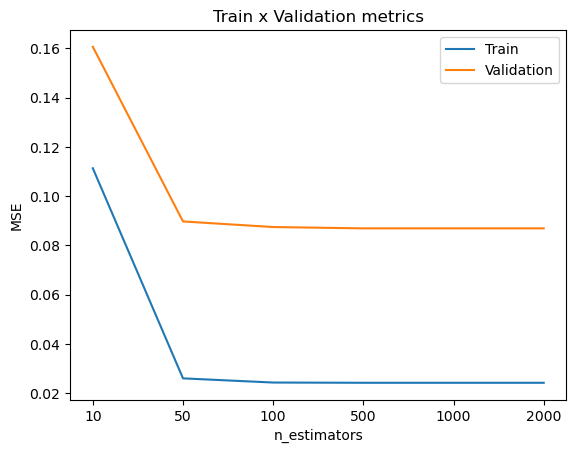

In [98]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [99]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

3

In [100]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

500

In [101]:
xgb_pH_model = XGBRegressor(n_estimators = 500, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_pH_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-rmse:6.42095
[1]	validation_0-rmse:5.77873
[2]	validation_0-rmse:5.20232
[3]	validation_0-rmse:4.68393
[4]	validation_0-rmse:4.21664
[5]	validation_0-rmse:3.79746
[6]	validation_0-rmse:3.42077
[7]	validation_0-rmse:3.08050
[8]	validation_0-rmse:2.77487
[9]	validation_0-rmse:2.50011
[10]	validation_0-rmse:2.25392
[11]	validation_0-rmse:2.03210
[12]	validation_0-rmse:1.83303
[13]	validation_0-rmse:1.65439
[14]	validation_0-rmse:1.49571
[15]	validation_0-rmse:1.35252
[16]	validation_0-rmse:1.22411
[17]	validation_0-rmse:1.11024
[18]	validation_0-rmse:1.01006
[19]	validation_0-rmse:0.92133
[20]	validation_0-rmse:0.84223
[21]	validation_0-rmse:0.77128
[22]	validation_0-rmse:0.70943
[23]	validation_0-rmse:0.65534
[24]	validation_0-rmse:0.60274
[25]	validation_0-rmse:0.56143
[26]	validation_0-rmse:0.52445
[27]	validation_0-rmse:0.49366
[28]	validation_0-rmse:0.46826
[29]	validation_0-rmse:0.44632
[30]	validation_0-rmse:0.42762
[31]	validation_0-rmse:0.41230
[32]	validation_0-

[260]	validation_0-rmse:0.34445
[261]	validation_0-rmse:0.34449
[262]	validation_0-rmse:0.34448
[263]	validation_0-rmse:0.34446
[264]	validation_0-rmse:0.34444
[265]	validation_0-rmse:0.34452
[266]	validation_0-rmse:0.34453
[267]	validation_0-rmse:0.34451
[268]	validation_0-rmse:0.34455
[269]	validation_0-rmse:0.34463
[270]	validation_0-rmse:0.34462
[271]	validation_0-rmse:0.34469
[272]	validation_0-rmse:0.34468
[273]	validation_0-rmse:0.34467
[274]	validation_0-rmse:0.34472
[275]	validation_0-rmse:0.34470
[276]	validation_0-rmse:0.34473
[277]	validation_0-rmse:0.34482
[278]	validation_0-rmse:0.34490
[279]	validation_0-rmse:0.34492
[280]	validation_0-rmse:0.34493
[281]	validation_0-rmse:0.34498
[282]	validation_0-rmse:0.34496
[283]	validation_0-rmse:0.34494
[284]	validation_0-rmse:0.34495
[285]	validation_0-rmse:0.34493
[286]	validation_0-rmse:0.34495
[287]	validation_0-rmse:0.34497
[288]	validation_0-rmse:0.34493
[289]	validation_0-rmse:0.34495
[290]	validation_0-rmse:0.34495
[291]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [102]:
xgb_pH_model.best_iteration

499

In [103]:
print(f"MSE for train:\n\tMSE: {MSE(xgb_pH_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(xgb_pH_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.0239
MSE for validation:
	MSE: 0.0824


In [104]:
y_pred_pH = xgb_pH_model.predict(X_val)

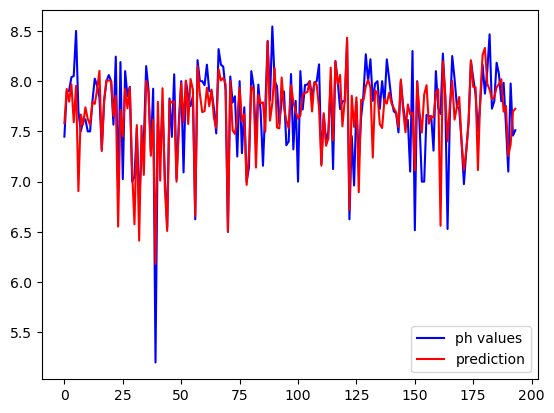

In [105]:
plt.plot(range(len(y_val)),y_val,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best');

In [106]:
diff_pH = y_pred_pH - y_val

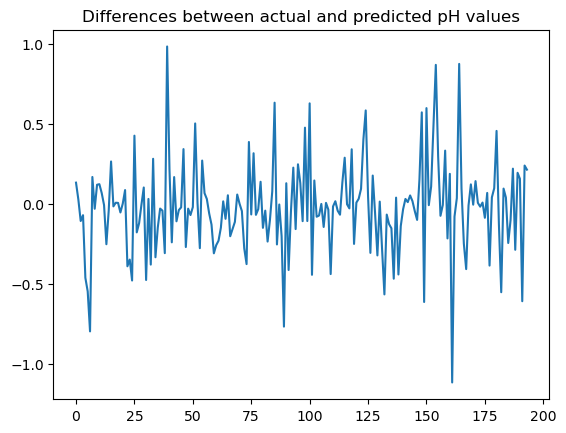

In [107]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values');

#### Getting Nitrate Value

In [108]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Totalcaliform']]

In [109]:
X.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Totalcaliform
0,9.0,9.0,8.0,85.0,0.1,397.0
1,10.0,9.0,8.0,102.0,0.3,954.0
2,11.0,9.0,8.0,96.0,0.2,653.0
3,13.0,9.0,8.0,94.0,0.2,317.0
4,14.0,10.0,8.0,112.0,0.2,1072.0


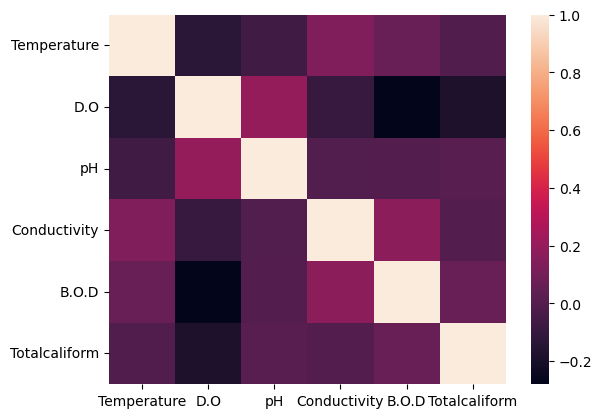

In [110]:
sns.heatmap(X.corr());

In [111]:
y = df_new['Nitrate']

In [112]:
y.value_counts()

4.000000     42
3.000000     41
1.380000     34
2.000000     27
1.711670     19
             ..
2.842445      1
2.806900      1
1.875483      1
1.888775      1
30.000000     1
Name: Nitrate, Length: 674, dtype: int64

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [114]:
X_train.shape

(773, 6)

In [115]:
y_train.shape

(773,)

In [116]:
X_val.shape

(194, 6)

In [117]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500]

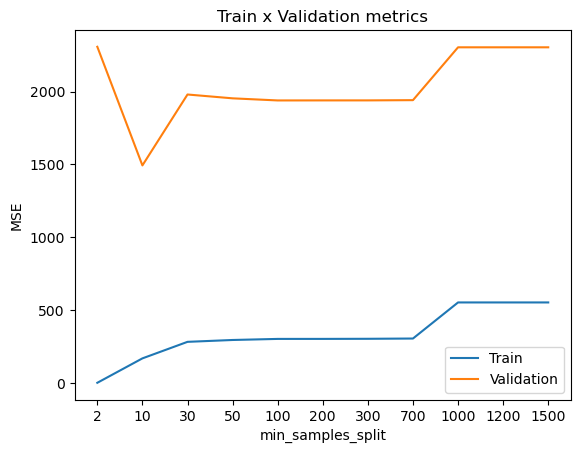

In [118]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [119]:
min_samples_split_list = np.arange(2,30)

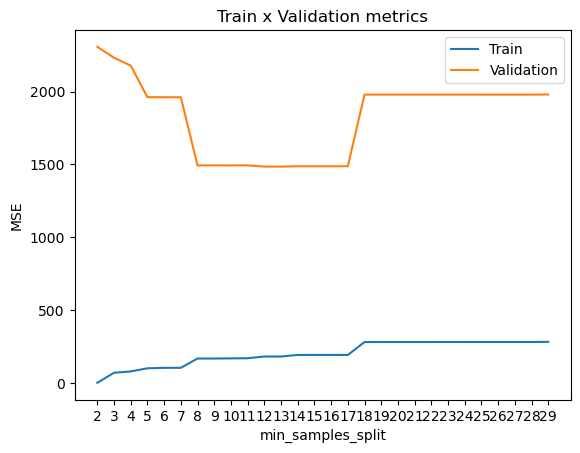

In [120]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [121]:
min_samples_split_list = np.arange(7,20)

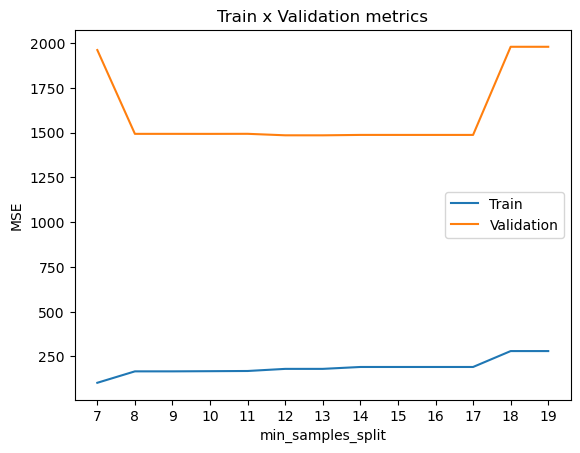

In [122]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [123]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

6

In [124]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

13

In [125]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

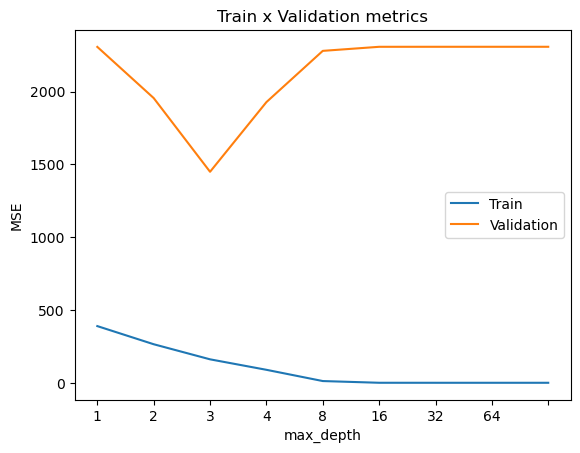

In [126]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

    Chosen max_depth = 3
    Chosen min_samples_split = 13

In [127]:
decision_tree_nitr_model = DecisionTreeRegressor(min_samples_split = 13,
                                             max_depth = 3,
                                             random_state = 123).fit(X_train,y_train)

In [128]:
print(f"MSE for train:\n\tMSE: {MSE(decision_tree_nitr_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(decision_tree_nitr_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 215.4973
MSE for validation:
	MSE: 1449.2868


In [129]:
y_pred_pH = decision_tree_nitr_model.predict(X_val)

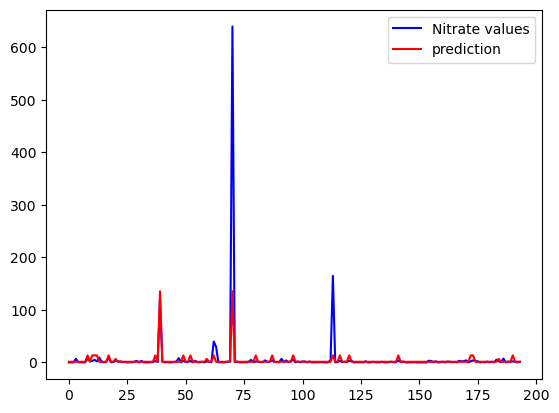

In [130]:
plt.plot(range(len(y_val)),y_val,'b',label='Nitrate values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best');

In [131]:
diff_pH = y_pred_pH - y_val

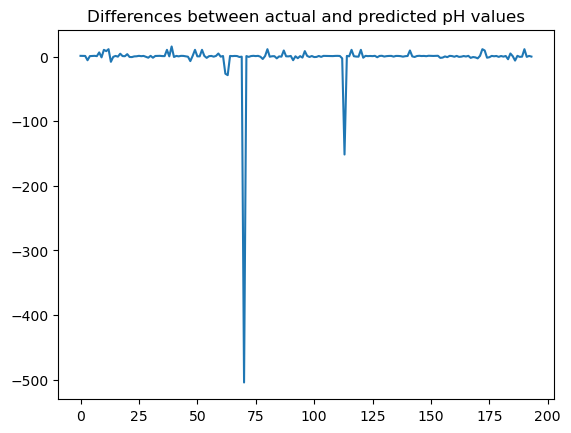

In [132]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values');

In [133]:
decision_tree_nitr_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [134]:
degree_list = np.arange(1,5)

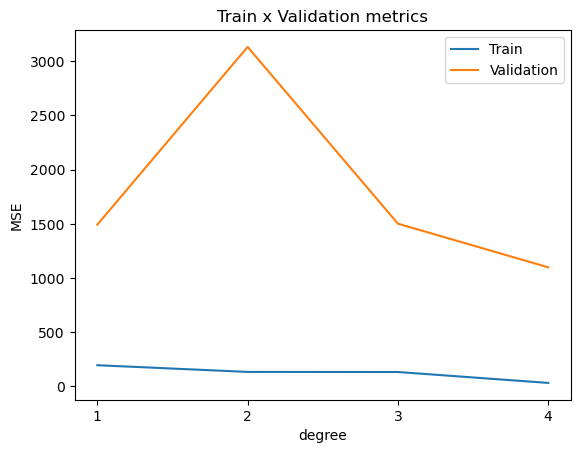

In [135]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = DecisionTreeRegressor(min_samples_split = 10,
                                  max_depth = 6,
                                  random_state = 123).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [136]:
MSE_list_val

[1492.5582918562636,
 3132.1135956094645,
 1501.5706671397156,
 1098.8503438678115]

In [137]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500, 2000]

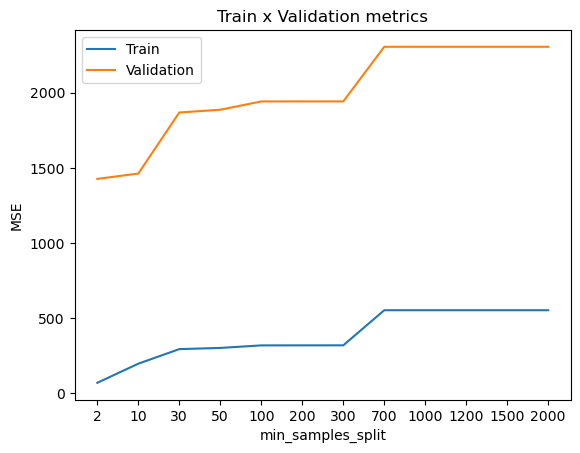

In [138]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [139]:
min_samples_split_list = np.arange(2,11)

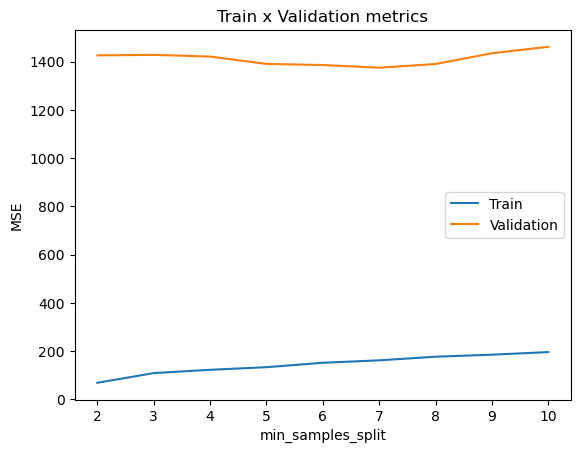

In [140]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [141]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

5

In [142]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

7

In [143]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

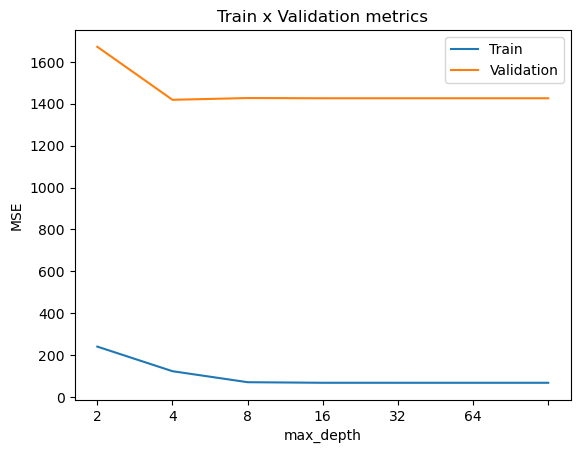

In [144]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [145]:
MSE_list_val

[1670.9898320871157,
 1418.2308339379058,
 1426.6334886784455,
 1425.602448664635,
 1425.594997712932,
 1425.5953247611526,
 1425.5953247611526]

In [146]:
max_depth_list = np.arange(8,33)

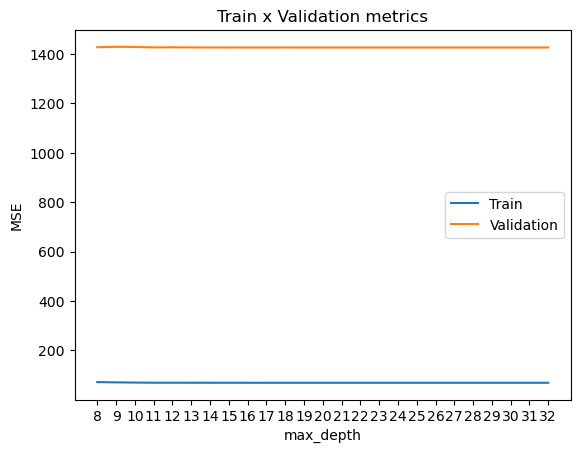

In [147]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [148]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

17

In [149]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

25

In [150]:
n_estimators_list = [10,50,100,500,1000,2000]

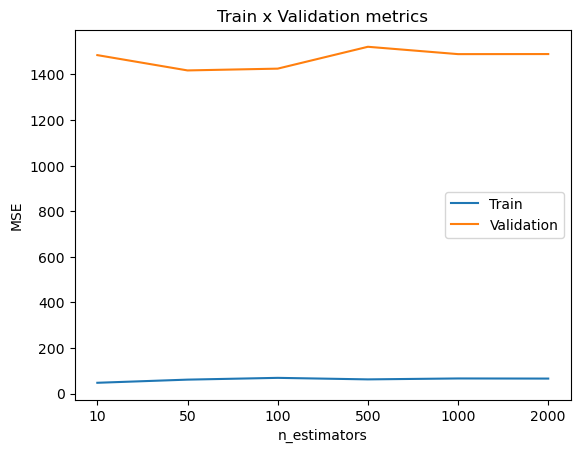

In [151]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [152]:
n_estimators_list = np.arange(10,100,5)

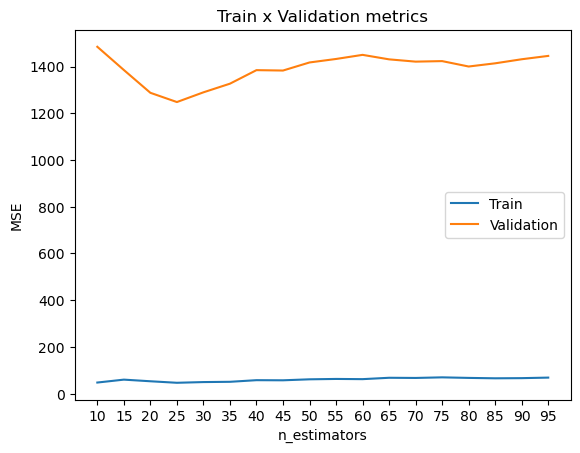

In [153]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [154]:
MSE_list_val

[1484.8966722670145,
 1385.511131178504,
 1287.9075817728335,
 1248.3109864643377,
 1289.9177863799018,
 1326.9351763773477,
 1384.886591109946,
 1383.1919447016583,
 1417.7652094019156,
 1432.7292065239926,
 1450.3241065725535,
 1431.0775883567862,
 1421.3187788552707,
 1423.5615926606724,
 1400.4292000258395,
 1414.1197566715973,
 1431.514089288314,
 1445.8430953609154]

In [155]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

3

In [156]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

25

    Chosen max_depth = 25
    Chosen n_estimators = 25
    Chosen min_samples_split = 7

In [157]:
random_forest_nitr_model = RandomForestRegressor(n_estimators = 25,
                                             max_depth = 25, 
                                             min_samples_split = 7).fit(X_train,y_train)

In [158]:
print(f"MSE for train:\n\tMSE: {MSE(random_forest_nitr_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(random_forest_nitr_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 168.5915
MSE for validation:
	MSE: 1394.2286


In [159]:
y_pred_pH = random_forest_nitr_model.predict(X_val)

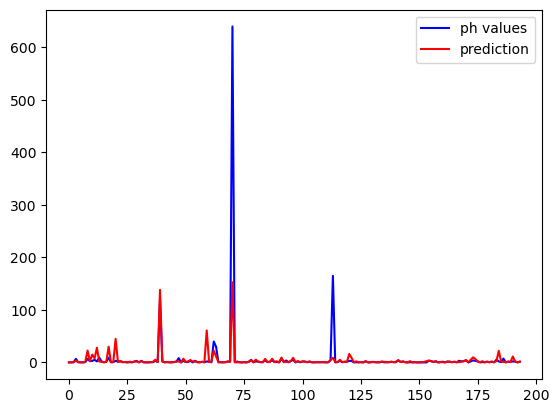

In [160]:
plt.plot(range(len(y_val)),y_val,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best');

In [161]:
diff_pH = y_pred_pH - y_val

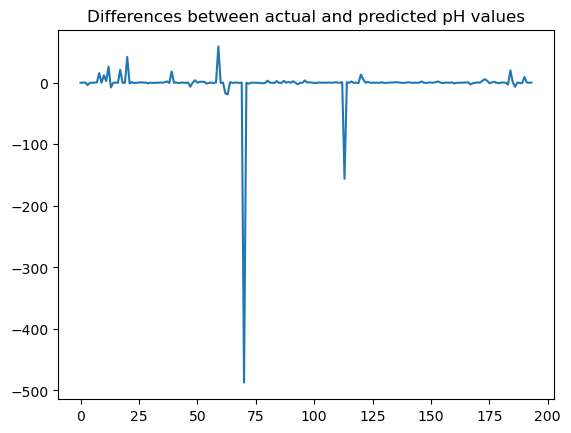

In [162]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values');

In [163]:
degree_list = np.arange(1,5)

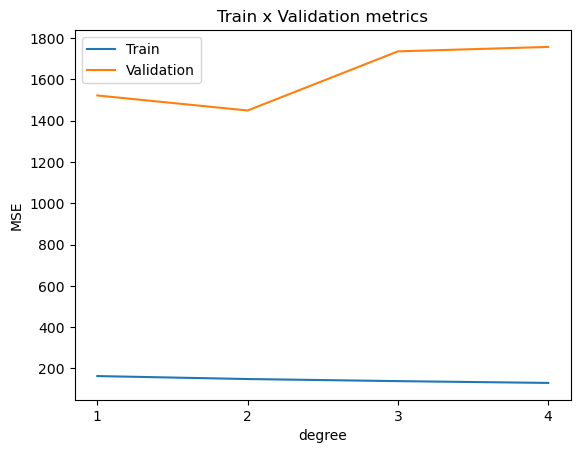

In [164]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = RandomForestRegressor(n_estimators = 25,
                                  max_depth = 25,
                                  min_samples_split = 7).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [165]:
MSE_list_val

[1521.7804661609878, 1449.1007291591693, 1735.323970941274, 1756.899161484811]

In [166]:
n = int(len(X_train)*0.8) ## Using 80% to train and 20% to eval

In [167]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [168]:
n_estimators_list = [10,50,100,500,1000,2000]

In [169]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = XGBRegressor(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

[0]	validation_0-rmse:12.21689
[1]	validation_0-rmse:12.24081
[2]	validation_0-rmse:13.79113
[3]	validation_0-rmse:13.36284
[4]	validation_0-rmse:13.21338
[5]	validation_0-rmse:13.29361
[6]	validation_0-rmse:13.53318
[7]	validation_0-rmse:13.84803
[8]	validation_0-rmse:13.91526
[9]	validation_0-rmse:14.02508
[0]	validation_0-rmse:12.21689
[1]	validation_0-rmse:12.24081
[2]	validation_0-rmse:13.79113
[3]	validation_0-rmse:13.36284
[4]	validation_0-rmse:13.21338
[5]	validation_0-rmse:13.29361
[6]	validation_0-rmse:13.53318
[7]	validation_0-rmse:13.84803
[8]	validation_0-rmse:13.91526
[9]	validation_0-rmse:14.02508
[10]	validation_0-rmse:14.11432
[11]	validation_0-rmse:14.21552
[12]	validation_0-rmse:14.37288
[13]	validation_0-rmse:14.44311
[14]	validation_0-rmse:14.53206
[15]	validation_0-rmse:14.65584
[16]	validation_0-rmse:14.74246
[17]	validation_0-rmse:14.78937
[18]	validation_0-rmse:14.86153
[19]	validation_0-rmse:14.90303
[20]	validation_0-rmse:14.96905
[21]	validation_0-rmse:14.97

[98]	validation_0-rmse:14.98742
[99]	validation_0-rmse:14.98727
[100]	validation_0-rmse:14.98743
[101]	validation_0-rmse:14.98730
[102]	validation_0-rmse:14.98711
[103]	validation_0-rmse:14.98691
[104]	validation_0-rmse:14.98645
[105]	validation_0-rmse:14.98602
[106]	validation_0-rmse:14.98567
[107]	validation_0-rmse:14.98556
[108]	validation_0-rmse:14.98608
[109]	validation_0-rmse:14.98593
[110]	validation_0-rmse:14.98637
[111]	validation_0-rmse:14.98615
[112]	validation_0-rmse:14.98640
[113]	validation_0-rmse:14.98685
[114]	validation_0-rmse:14.98707
[115]	validation_0-rmse:14.98643
[116]	validation_0-rmse:14.98620
[117]	validation_0-rmse:14.98621
[118]	validation_0-rmse:14.98619
[119]	validation_0-rmse:14.98658
[120]	validation_0-rmse:14.98662
[121]	validation_0-rmse:14.98651
[122]	validation_0-rmse:14.98722
[123]	validation_0-rmse:14.98746
[124]	validation_0-rmse:14.98665
[125]	validation_0-rmse:14.98662
[126]	validation_0-rmse:14.98672
[127]	validation_0-rmse:14.98668
[128]	valida

[347]	validation_0-rmse:14.98633
[348]	validation_0-rmse:14.98633
[349]	validation_0-rmse:14.98633
[350]	validation_0-rmse:14.98633
[351]	validation_0-rmse:14.98633
[352]	validation_0-rmse:14.98633
[353]	validation_0-rmse:14.98633
[354]	validation_0-rmse:14.98633
[355]	validation_0-rmse:14.98633
[356]	validation_0-rmse:14.98633
[357]	validation_0-rmse:14.98633
[358]	validation_0-rmse:14.98633
[359]	validation_0-rmse:14.98633
[360]	validation_0-rmse:14.98633
[361]	validation_0-rmse:14.98633
[362]	validation_0-rmse:14.98633
[363]	validation_0-rmse:14.98633
[364]	validation_0-rmse:14.98633
[365]	validation_0-rmse:14.98633
[366]	validation_0-rmse:14.98633
[367]	validation_0-rmse:14.98633
[368]	validation_0-rmse:14.98633
[369]	validation_0-rmse:14.98633
[370]	validation_0-rmse:14.98633
[371]	validation_0-rmse:14.98633
[372]	validation_0-rmse:14.98633
[373]	validation_0-rmse:14.98633
[374]	validation_0-rmse:14.98633
[375]	validation_0-rmse:14.98633
[376]	validation_0-rmse:14.98633
[377]	vali

[99]	validation_0-rmse:14.98727
[100]	validation_0-rmse:14.98743
[101]	validation_0-rmse:14.98730
[102]	validation_0-rmse:14.98711
[103]	validation_0-rmse:14.98691
[104]	validation_0-rmse:14.98645
[105]	validation_0-rmse:14.98602
[106]	validation_0-rmse:14.98567
[107]	validation_0-rmse:14.98556
[108]	validation_0-rmse:14.98608
[109]	validation_0-rmse:14.98593
[110]	validation_0-rmse:14.98637
[111]	validation_0-rmse:14.98615
[112]	validation_0-rmse:14.98640
[113]	validation_0-rmse:14.98685
[114]	validation_0-rmse:14.98707
[115]	validation_0-rmse:14.98643
[116]	validation_0-rmse:14.98620
[117]	validation_0-rmse:14.98621
[118]	validation_0-rmse:14.98619
[119]	validation_0-rmse:14.98658
[120]	validation_0-rmse:14.98662
[121]	validation_0-rmse:14.98651
[122]	validation_0-rmse:14.98722
[123]	validation_0-rmse:14.98746
[124]	validation_0-rmse:14.98665
[125]	validation_0-rmse:14.98662
[126]	validation_0-rmse:14.98672
[127]	validation_0-rmse:14.98668
[128]	validation_0-rmse:14.98636
[129]	valid

[348]	validation_0-rmse:14.98633
[349]	validation_0-rmse:14.98633
[350]	validation_0-rmse:14.98633
[351]	validation_0-rmse:14.98633
[352]	validation_0-rmse:14.98633
[353]	validation_0-rmse:14.98633
[354]	validation_0-rmse:14.98633
[355]	validation_0-rmse:14.98633
[356]	validation_0-rmse:14.98633
[357]	validation_0-rmse:14.98633
[358]	validation_0-rmse:14.98633
[359]	validation_0-rmse:14.98633
[360]	validation_0-rmse:14.98633
[361]	validation_0-rmse:14.98633
[362]	validation_0-rmse:14.98633
[363]	validation_0-rmse:14.98633
[364]	validation_0-rmse:14.98633
[365]	validation_0-rmse:14.98633
[366]	validation_0-rmse:14.98633
[367]	validation_0-rmse:14.98633
[368]	validation_0-rmse:14.98633
[369]	validation_0-rmse:14.98633
[370]	validation_0-rmse:14.98633
[371]	validation_0-rmse:14.98633
[372]	validation_0-rmse:14.98633
[373]	validation_0-rmse:14.98633
[374]	validation_0-rmse:14.98633
[375]	validation_0-rmse:14.98633
[376]	validation_0-rmse:14.98633
[377]	validation_0-rmse:14.98633
[378]	vali

[597]	validation_0-rmse:14.98633
[598]	validation_0-rmse:14.98633
[599]	validation_0-rmse:14.98633
[600]	validation_0-rmse:14.98633
[601]	validation_0-rmse:14.98633
[602]	validation_0-rmse:14.98633
[603]	validation_0-rmse:14.98633
[604]	validation_0-rmse:14.98633
[605]	validation_0-rmse:14.98633
[606]	validation_0-rmse:14.98633
[607]	validation_0-rmse:14.98633
[608]	validation_0-rmse:14.98633
[609]	validation_0-rmse:14.98633
[610]	validation_0-rmse:14.98633
[611]	validation_0-rmse:14.98633
[612]	validation_0-rmse:14.98633
[613]	validation_0-rmse:14.98633
[614]	validation_0-rmse:14.98633
[615]	validation_0-rmse:14.98633
[616]	validation_0-rmse:14.98633
[617]	validation_0-rmse:14.98633
[618]	validation_0-rmse:14.98633
[619]	validation_0-rmse:14.98633
[620]	validation_0-rmse:14.98633
[621]	validation_0-rmse:14.98633
[622]	validation_0-rmse:14.98633
[623]	validation_0-rmse:14.98633
[624]	validation_0-rmse:14.98633
[625]	validation_0-rmse:14.98633
[626]	validation_0-rmse:14.98633
[627]	vali

[846]	validation_0-rmse:14.98633
[847]	validation_0-rmse:14.98633
[848]	validation_0-rmse:14.98633
[849]	validation_0-rmse:14.98633
[850]	validation_0-rmse:14.98633
[851]	validation_0-rmse:14.98633
[852]	validation_0-rmse:14.98633
[853]	validation_0-rmse:14.98633
[854]	validation_0-rmse:14.98633
[855]	validation_0-rmse:14.98633
[856]	validation_0-rmse:14.98633
[857]	validation_0-rmse:14.98633
[858]	validation_0-rmse:14.98633
[859]	validation_0-rmse:14.98633
[860]	validation_0-rmse:14.98633
[861]	validation_0-rmse:14.98633
[862]	validation_0-rmse:14.98633
[863]	validation_0-rmse:14.98633
[864]	validation_0-rmse:14.98633
[865]	validation_0-rmse:14.98633
[866]	validation_0-rmse:14.98633
[867]	validation_0-rmse:14.98633
[868]	validation_0-rmse:14.98633
[869]	validation_0-rmse:14.98633
[870]	validation_0-rmse:14.98633
[871]	validation_0-rmse:14.98633
[872]	validation_0-rmse:14.98633
[873]	validation_0-rmse:14.98633
[874]	validation_0-rmse:14.98633
[875]	validation_0-rmse:14.98633
[876]	vali

[98]	validation_0-rmse:14.98742
[99]	validation_0-rmse:14.98727
[100]	validation_0-rmse:14.98743
[101]	validation_0-rmse:14.98730
[102]	validation_0-rmse:14.98711
[103]	validation_0-rmse:14.98691
[104]	validation_0-rmse:14.98645
[105]	validation_0-rmse:14.98602
[106]	validation_0-rmse:14.98567
[107]	validation_0-rmse:14.98556
[108]	validation_0-rmse:14.98608
[109]	validation_0-rmse:14.98593
[110]	validation_0-rmse:14.98637
[111]	validation_0-rmse:14.98615
[112]	validation_0-rmse:14.98640
[113]	validation_0-rmse:14.98685
[114]	validation_0-rmse:14.98707
[115]	validation_0-rmse:14.98643
[116]	validation_0-rmse:14.98620
[117]	validation_0-rmse:14.98621
[118]	validation_0-rmse:14.98619
[119]	validation_0-rmse:14.98658
[120]	validation_0-rmse:14.98662
[121]	validation_0-rmse:14.98651
[122]	validation_0-rmse:14.98722
[123]	validation_0-rmse:14.98746
[124]	validation_0-rmse:14.98665
[125]	validation_0-rmse:14.98662
[126]	validation_0-rmse:14.98672
[127]	validation_0-rmse:14.98668
[128]	valida

[346]	validation_0-rmse:14.98633
[347]	validation_0-rmse:14.98633
[348]	validation_0-rmse:14.98633
[349]	validation_0-rmse:14.98633
[350]	validation_0-rmse:14.98633
[351]	validation_0-rmse:14.98633
[352]	validation_0-rmse:14.98633
[353]	validation_0-rmse:14.98633
[354]	validation_0-rmse:14.98633
[355]	validation_0-rmse:14.98633
[356]	validation_0-rmse:14.98633
[357]	validation_0-rmse:14.98633
[358]	validation_0-rmse:14.98633
[359]	validation_0-rmse:14.98633
[360]	validation_0-rmse:14.98633
[361]	validation_0-rmse:14.98633
[362]	validation_0-rmse:14.98633
[363]	validation_0-rmse:14.98633
[364]	validation_0-rmse:14.98633
[365]	validation_0-rmse:14.98633
[366]	validation_0-rmse:14.98633
[367]	validation_0-rmse:14.98633
[368]	validation_0-rmse:14.98633
[369]	validation_0-rmse:14.98633
[370]	validation_0-rmse:14.98633
[371]	validation_0-rmse:14.98633
[372]	validation_0-rmse:14.98633
[373]	validation_0-rmse:14.98633
[374]	validation_0-rmse:14.98633
[375]	validation_0-rmse:14.98633
[376]	vali

[595]	validation_0-rmse:14.98633
[596]	validation_0-rmse:14.98633
[597]	validation_0-rmse:14.98633
[598]	validation_0-rmse:14.98633
[599]	validation_0-rmse:14.98633
[600]	validation_0-rmse:14.98633
[601]	validation_0-rmse:14.98633
[602]	validation_0-rmse:14.98633
[603]	validation_0-rmse:14.98633
[604]	validation_0-rmse:14.98633
[605]	validation_0-rmse:14.98633
[606]	validation_0-rmse:14.98633
[607]	validation_0-rmse:14.98633
[608]	validation_0-rmse:14.98633
[609]	validation_0-rmse:14.98633
[610]	validation_0-rmse:14.98633
[611]	validation_0-rmse:14.98633
[612]	validation_0-rmse:14.98633
[613]	validation_0-rmse:14.98633
[614]	validation_0-rmse:14.98633
[615]	validation_0-rmse:14.98633
[616]	validation_0-rmse:14.98633
[617]	validation_0-rmse:14.98633
[618]	validation_0-rmse:14.98633
[619]	validation_0-rmse:14.98633
[620]	validation_0-rmse:14.98633
[621]	validation_0-rmse:14.98633
[622]	validation_0-rmse:14.98633
[623]	validation_0-rmse:14.98633
[624]	validation_0-rmse:14.98633
[625]	vali

[844]	validation_0-rmse:14.98633
[845]	validation_0-rmse:14.98633
[846]	validation_0-rmse:14.98633
[847]	validation_0-rmse:14.98633
[848]	validation_0-rmse:14.98633
[849]	validation_0-rmse:14.98633
[850]	validation_0-rmse:14.98633
[851]	validation_0-rmse:14.98633
[852]	validation_0-rmse:14.98633
[853]	validation_0-rmse:14.98633
[854]	validation_0-rmse:14.98633
[855]	validation_0-rmse:14.98633
[856]	validation_0-rmse:14.98633
[857]	validation_0-rmse:14.98633
[858]	validation_0-rmse:14.98633
[859]	validation_0-rmse:14.98633
[860]	validation_0-rmse:14.98633
[861]	validation_0-rmse:14.98633
[862]	validation_0-rmse:14.98633
[863]	validation_0-rmse:14.98633
[864]	validation_0-rmse:14.98633
[865]	validation_0-rmse:14.98633
[866]	validation_0-rmse:14.98633
[867]	validation_0-rmse:14.98633
[868]	validation_0-rmse:14.98633
[869]	validation_0-rmse:14.98633
[870]	validation_0-rmse:14.98633
[871]	validation_0-rmse:14.98633
[872]	validation_0-rmse:14.98633
[873]	validation_0-rmse:14.98633
[874]	vali

[1090]	validation_0-rmse:14.98633
[1091]	validation_0-rmse:14.98633
[1092]	validation_0-rmse:14.98633
[1093]	validation_0-rmse:14.98633
[1094]	validation_0-rmse:14.98633
[1095]	validation_0-rmse:14.98633
[1096]	validation_0-rmse:14.98633
[1097]	validation_0-rmse:14.98633
[1098]	validation_0-rmse:14.98633
[1099]	validation_0-rmse:14.98633
[1100]	validation_0-rmse:14.98633
[1101]	validation_0-rmse:14.98633
[1102]	validation_0-rmse:14.98633
[1103]	validation_0-rmse:14.98633
[1104]	validation_0-rmse:14.98633
[1105]	validation_0-rmse:14.98633
[1106]	validation_0-rmse:14.98633
[1107]	validation_0-rmse:14.98633
[1108]	validation_0-rmse:14.98633
[1109]	validation_0-rmse:14.98633
[1110]	validation_0-rmse:14.98633
[1111]	validation_0-rmse:14.98633
[1112]	validation_0-rmse:14.98633
[1113]	validation_0-rmse:14.98633
[1114]	validation_0-rmse:14.98633
[1115]	validation_0-rmse:14.98633
[1116]	validation_0-rmse:14.98633
[1117]	validation_0-rmse:14.98633
[1118]	validation_0-rmse:14.98633
[1119]	validat

[1331]	validation_0-rmse:14.98633
[1332]	validation_0-rmse:14.98633
[1333]	validation_0-rmse:14.98633
[1334]	validation_0-rmse:14.98633
[1335]	validation_0-rmse:14.98633
[1336]	validation_0-rmse:14.98633
[1337]	validation_0-rmse:14.98633
[1338]	validation_0-rmse:14.98633
[1339]	validation_0-rmse:14.98633
[1340]	validation_0-rmse:14.98633
[1341]	validation_0-rmse:14.98633
[1342]	validation_0-rmse:14.98633
[1343]	validation_0-rmse:14.98633
[1344]	validation_0-rmse:14.98633
[1345]	validation_0-rmse:14.98633
[1346]	validation_0-rmse:14.98633
[1347]	validation_0-rmse:14.98633
[1348]	validation_0-rmse:14.98633
[1349]	validation_0-rmse:14.98633
[1350]	validation_0-rmse:14.98633
[1351]	validation_0-rmse:14.98633
[1352]	validation_0-rmse:14.98633
[1353]	validation_0-rmse:14.98633
[1354]	validation_0-rmse:14.98633
[1355]	validation_0-rmse:14.98633
[1356]	validation_0-rmse:14.98633
[1357]	validation_0-rmse:14.98633
[1358]	validation_0-rmse:14.98633
[1359]	validation_0-rmse:14.98633
[1360]	validat

[1572]	validation_0-rmse:14.98633
[1573]	validation_0-rmse:14.98633
[1574]	validation_0-rmse:14.98633
[1575]	validation_0-rmse:14.98633
[1576]	validation_0-rmse:14.98633
[1577]	validation_0-rmse:14.98633
[1578]	validation_0-rmse:14.98633
[1579]	validation_0-rmse:14.98633
[1580]	validation_0-rmse:14.98633
[1581]	validation_0-rmse:14.98633
[1582]	validation_0-rmse:14.98633
[1583]	validation_0-rmse:14.98633
[1584]	validation_0-rmse:14.98633
[1585]	validation_0-rmse:14.98633
[1586]	validation_0-rmse:14.98633
[1587]	validation_0-rmse:14.98633
[1588]	validation_0-rmse:14.98633
[1589]	validation_0-rmse:14.98633
[1590]	validation_0-rmse:14.98633
[1591]	validation_0-rmse:14.98633
[1592]	validation_0-rmse:14.98633
[1593]	validation_0-rmse:14.98633
[1594]	validation_0-rmse:14.98633
[1595]	validation_0-rmse:14.98633
[1596]	validation_0-rmse:14.98633
[1597]	validation_0-rmse:14.98633
[1598]	validation_0-rmse:14.98633
[1599]	validation_0-rmse:14.98633
[1600]	validation_0-rmse:14.98633
[1601]	validat

[1813]	validation_0-rmse:14.98633
[1814]	validation_0-rmse:14.98633
[1815]	validation_0-rmse:14.98633
[1816]	validation_0-rmse:14.98633
[1817]	validation_0-rmse:14.98633
[1818]	validation_0-rmse:14.98633
[1819]	validation_0-rmse:14.98633
[1820]	validation_0-rmse:14.98633
[1821]	validation_0-rmse:14.98633
[1822]	validation_0-rmse:14.98633
[1823]	validation_0-rmse:14.98633
[1824]	validation_0-rmse:14.98633
[1825]	validation_0-rmse:14.98633
[1826]	validation_0-rmse:14.98633
[1827]	validation_0-rmse:14.98633
[1828]	validation_0-rmse:14.98633
[1829]	validation_0-rmse:14.98633
[1830]	validation_0-rmse:14.98633
[1831]	validation_0-rmse:14.98633
[1832]	validation_0-rmse:14.98633
[1833]	validation_0-rmse:14.98633
[1834]	validation_0-rmse:14.98633
[1835]	validation_0-rmse:14.98633
[1836]	validation_0-rmse:14.98633
[1837]	validation_0-rmse:14.98633
[1838]	validation_0-rmse:14.98633
[1839]	validation_0-rmse:14.98633
[1840]	validation_0-rmse:14.98633
[1841]	validation_0-rmse:14.98633
[1842]	validat

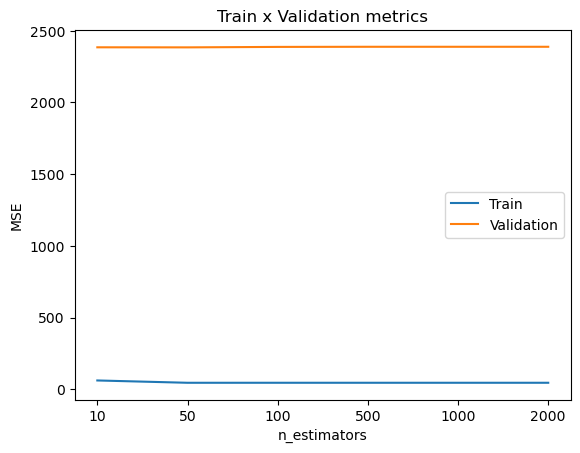

In [170]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [171]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

1

In [172]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

50

In [173]:
xgb_nitr_model = XGBRegressor(n_estimators = 50, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_nitr_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-rmse:13.93140
[1]	validation_0-rmse:12.98431
[2]	validation_0-rmse:12.32372
[3]	validation_0-rmse:12.03309
[4]	validation_0-rmse:12.01539
[5]	validation_0-rmse:11.26233
[6]	validation_0-rmse:10.66939
[7]	validation_0-rmse:10.11149
[8]	validation_0-rmse:9.71602
[9]	validation_0-rmse:9.39169
[10]	validation_0-rmse:9.08334
[11]	validation_0-rmse:8.89324
[12]	validation_0-rmse:8.74045
[13]	validation_0-rmse:8.61906
[14]	validation_0-rmse:8.61240
[15]	validation_0-rmse:8.56452
[16]	validation_0-rmse:8.58254
[17]	validation_0-rmse:8.58610
[18]	validation_0-rmse:8.64058
[19]	validation_0-rmse:8.69108
[20]	validation_0-rmse:8.75610
[21]	validation_0-rmse:8.83131
[22]	validation_0-rmse:8.91451
[23]	validation_0-rmse:8.98914
[24]	validation_0-rmse:9.00842
[25]	validation_0-rmse:9.03770
[26]	validation_0-rmse:9.09145
[27]	validation_0-rmse:9.14101
[28]	validation_0-rmse:9.19462
[29]	validation_0-rmse:9.24784
[30]	validation_0-rmse:9.31358
[31]	validation_0-rmse:9.37342
[32]	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [175]:
xgb_nitr_model.best_iteration

49

In [177]:
print(f"MSE for train:\n\tMSE: {MSE(xgb_nitr_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(xgb_nitr_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 31.7594
MSE for validation:
	MSE: 2298.7988


In [178]:
y_pred_pH = xgb_nitr_model.predict(X_val)

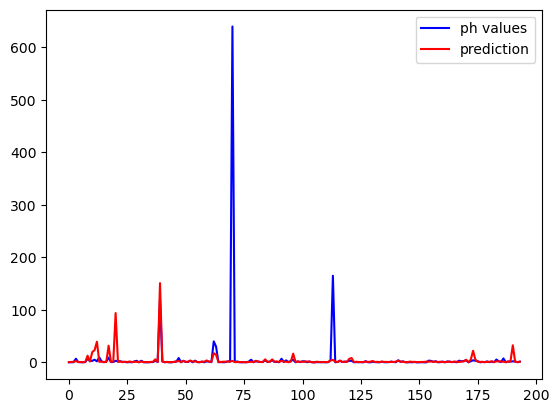

In [179]:
plt.plot(range(len(y_val)),y_val,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best');

In [180]:
diff_pH = y_pred_pH - y_val

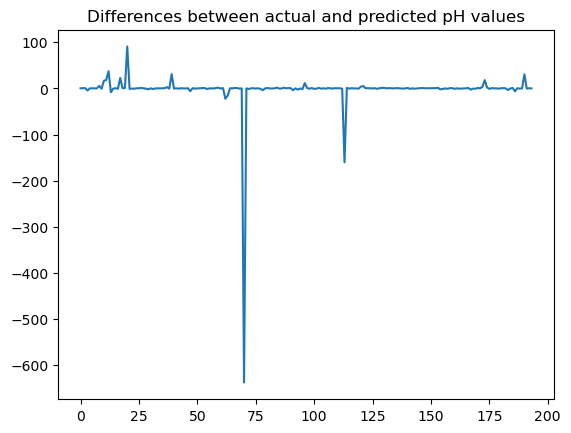

In [181]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values');

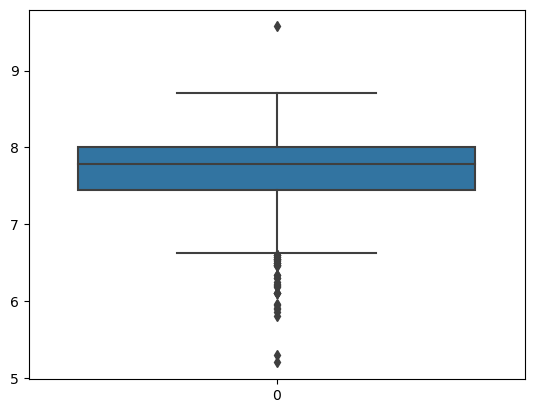

In [182]:
sns.boxplot(df['pH']);

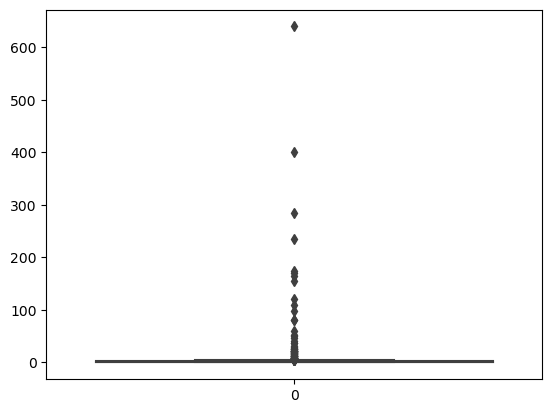

In [183]:
sns.boxplot(df['Nitrate']);

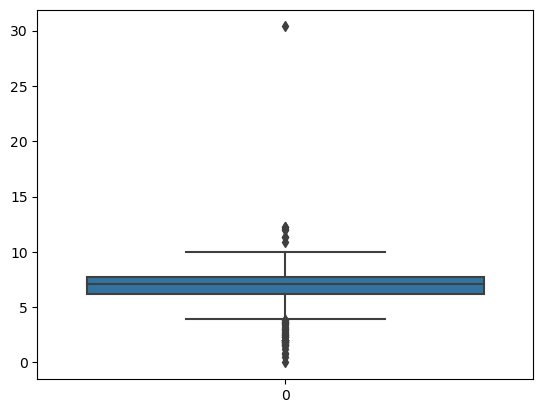

In [184]:
sns.boxplot(df['D.O']);

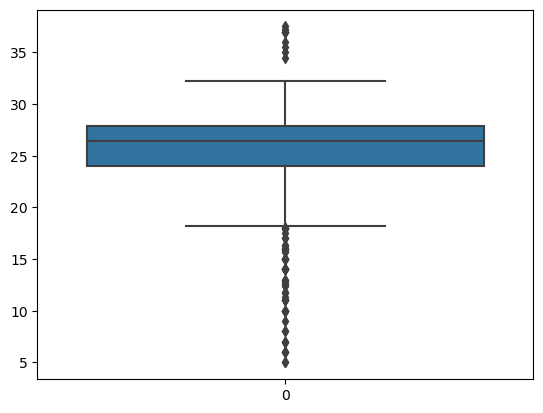

In [185]:
sns.boxplot(df['Temperature']);

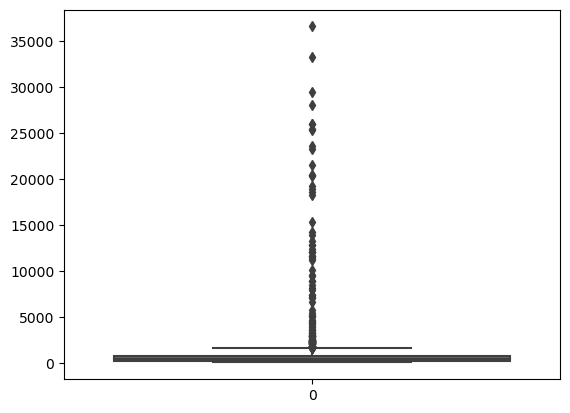

In [186]:
sns.boxplot(df['Conductivity']);

#### DUMPING NEEDED MODELS AND PREPROCCESSORS

In [188]:
import joblib

##### Dumping for pH

In [189]:
joblib.dump(random_forest_pH_model,'pH_model.sav')

['pH_model.sav']

##### Dumping for Nitrate

In [190]:
 joblib.dump(random_forest_nitr_model,'nitr_model.sav')

['nitr_model.sav']